In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
#Loading the dataset
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
data.shape

(8124, 23)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [61]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [62]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null values

In [63]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms')

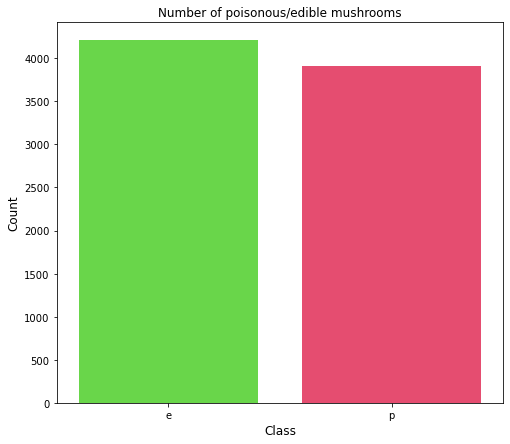

In [64]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

From the barplot we can see the dataset is balanced

# Data Manipulation

In [65]:
#Columns are of categorical type. So we can use LabelEncoder to convert categorical values to ordinal.
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [66]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [67]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

The column “veil-type” is 0 and not contributing to the data so we can remove it.

In [68]:
data = data.drop(["veil-type"],axis=1)

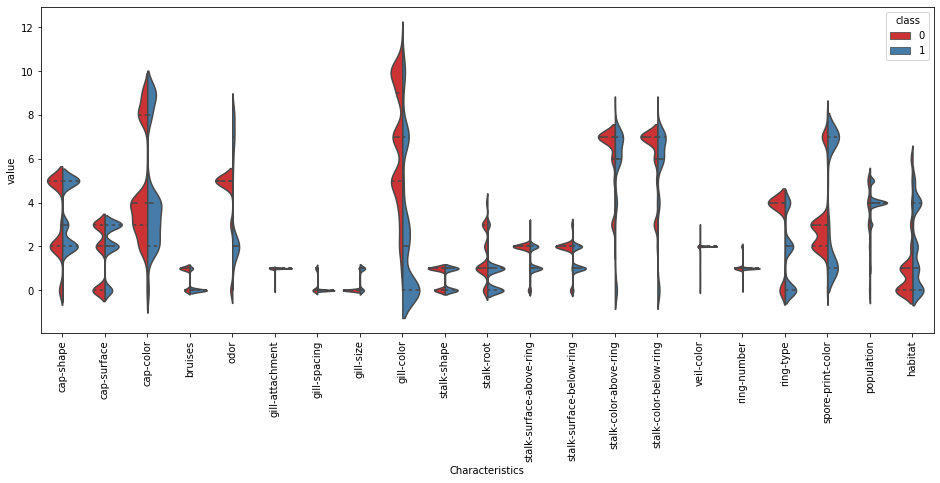

In [69]:
#Using violin plot we can see the distribution of the classification
data_div = pd.melt(data, 'class', var_name='Characteristics')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x='Characteristics', y='value', hue='class', split = True, data=data_div, inner = 'quartile', palette = 'Set1')
data_no_class = data.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(data_no_class.columns));

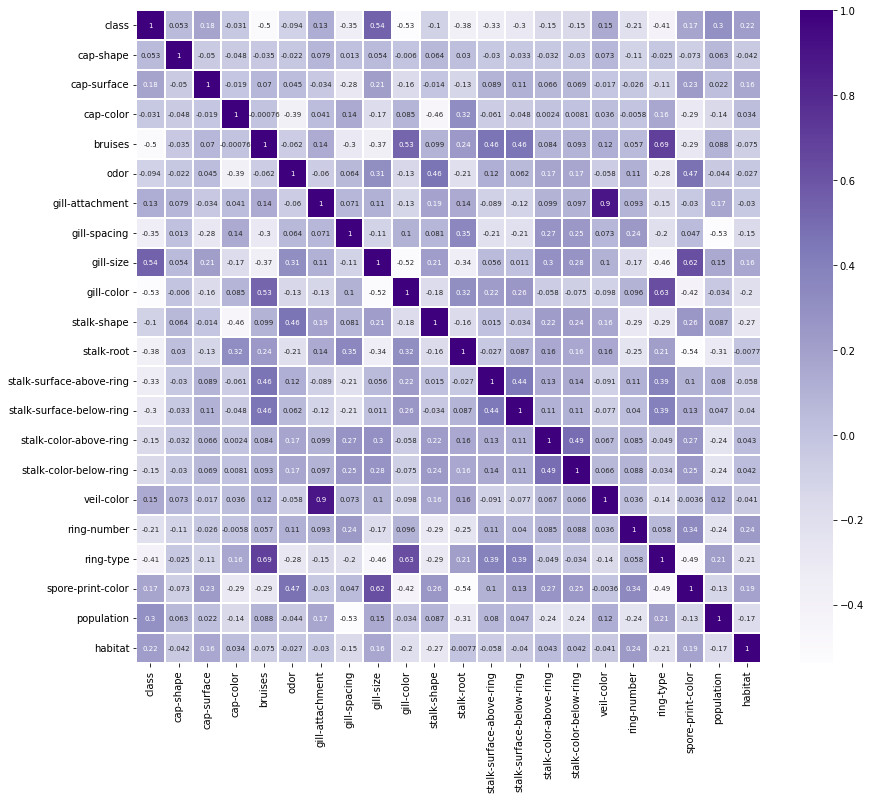

In [70]:
#Correlation between the variables
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

In [71]:
#Prepairing the data for train test split
x=data.drop(['class'],axis=1).values
y=data['class'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-0.23108882,  0.1369207 , -0.98259822, ...,  1.41971739,
         0.2873423 , -0.87717719],
       [ 1.01940764,  0.1369207 , -0.19967591, ...,  1.41971739,
         0.2873423 ,  1.44374884],
       [-0.85633705,  0.95105395, -0.98259822, ...,  1.41971739,
         0.2873423 ,  0.28328582],
       ...,
       [-0.85633705,  0.95105395, -0.19967591, ..., -0.25581597,
         1.08165859,  1.44374884],
       [-0.23108882,  0.1369207 , -0.98259822, ...,  1.41971739,
         0.2873423 ,  1.44374884],
       [-0.23108882, -1.4913458 , -0.59113706, ...,  1.41971739,
        -1.30129029, -0.29694568]])

In [73]:
x_train.shape

(6499, 21)

In [74]:
x_test.shape

(1625, 21)

# Classification methods

In [75]:
#1.Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(lr.score(x_test, y_test)*100,2)))

Test Accuracy: 95.2%


In [76]:
#Classification report of Logistic Regression Classifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,accuracy_score
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [77]:
#Confusion Matrix for Logistic Regression Classifier
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[799  44]
 [ 34 748]]


Logistic regression classifier made 1547 correct predictions and 78 incorrect predictions

In [78]:
#2. KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred),sep='\n')
print('Accuracy is',accuracy_score(y_pred,y_test))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]
Accuracy is 1.0


KNN classifier gives 100% accuracy 

In [79]:
#3.Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))
print("Test Accuracy: {}%".format(round(dt.score(x_test, y_test)*100, 2)))
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Test Accuracy: 100.0%
[[843   0]
 [  0 782]]


Decision Tree Classifier also gives 100% accuracy

In [80]:
#4.Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))
y_pred_rf = rf.predict(x_test)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

Test Accuracy: 100.0%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[843   0]
 [  0 782]]


Random Forest classifier also gives 100% accuracy

In [81]:
#5.Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))
y_pred_nb = nb.predict(x_test)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

Test Accuracy: 92.18%
Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

[[771  72]
 [ 55 727]]


Naive Bayes Classifier has a test accuracy of 92% . Confusion matrix shows 1498 correct predictions and 127 incorrect predictions

In [82]:
# fitting Bernoulli Naive Bayes to training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)
print("Test Accuracy: {}%".format(round(accuracy_score(y_test,y_pred)*100, 2)))
cm=confusion_matrix(y_pred,y_test)
cm

Test Accuracy: 89.54%


array([[817, 144],
       [ 26, 638]], dtype=int64)

#Predictions
Predicting some of the X_test results and matching it with true i.e. y_test values using Decision Tree Classifier.

In [83]:
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36])
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]
[0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1]


Since Decision tree classifier gives 100% accuracy we can see the test and predicted values are matching totally.

In [84]:
results = pd.DataFrame({'Model': ['Logistic Regression','KNN','Decision Tree','Random Forest','Naive Bayes'],
                        'Score': [95.2,100,100,100,92.1]})

result_df = results.sort_values(by='Score', ascending=False)

result_df

,Model,Score
1,KNN,100.0
2,Decision Tree,100.0
3,Random Forest,100.0
0,Logistic Regression,95.2
4,Naive Bayes,92.1


Most of the classification methods shows 100% accuracy with this dataset. So we can clearly classify edible and poisonous mushrooms .